In [1]:
import pandas as pd

In [58]:
#!pip install geopandas
#!pip install geopy

In [2]:
!ls

 AnalisedeCrimes-CambridgeData-2009-2016.ipynb
'Cambridge Crime Data 2009-2016.csv'
 clusterizacao.jpg
 Clusterizacao-RedesSociais.ipynb
 KMeans-Clusterizacao-Filmes.ipynb
 mosn.csv
 README.md
 tmdb_5000_movies.csv


In [59]:
f = 'Cambridge Crime Data 2009-2016.csv'
df = pd.read_csv(f)
df.head()

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA"
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA"
2,2009-00004,01/01/2009 01:43:00 AM,01/01/2009 02:20 - 02:35,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg..."
3,2009-00005,01/01/2009 02:27:00 AM,01/01/2009 02:20 - 02:45,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA"
4,2009-00006,01/01/2009 02:34:00 AM,01/01/2009 02:15 - 02:35,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA"


In [62]:
locator = Nominatim(user_agent='myGeocoder')
location = locator.geocode('Champ de Mars, Paris, France')

NameError: name 'Nominatim' is not defined

In [ ]:
print(“Latitude = {}, Longitude = {}”.format(location.latitude, location.longitude))

In [4]:
df.Crime.value_counts()

Larceny from MV           4837
Hit and Run               4662
Domestic Dispute          3909
Mal. Dest. Property       3671
Simple Assault            3295
Larceny from Building     2857
Shoplifting               2789
Larceny of Bicycle        2750
Housebreak                2676
Forgery                   2584
Warrant Arrest            2575
Larceny from Person       2276
Larceny from Residence    1743
Aggravated Assault        1726
Threats                   1637
Auto Theft                1102
Missing Person             950
Flim Flam                  939
Harassment                 816
Street Robbery             759
Drugs                      673
Admin Error                660
Accident                   627
Commercial Break           584
Phone Calls                450
OUI                        387
Suspicious Package         381
Violation of R.O.          377
Trespassing                359
Disorderly                 306
Larceny (Misc)             269
Taxi Violation             259
Larceny 

In [5]:
df.Neighborhood.value_counts()

Cambridgeport       7830
East Cambridge      7691
Area 4              6025
North Cambridge     5602
West Cambridge      5544
Mid-Cambridge       5496
Riverside           5254
Inman/Harrington    4195
Peabody             3522
Agassiz             1520
Highlands           1203
MIT                 1092
Strawberry Hill     1038
Name: Neighborhood, dtype: int64

In [6]:
df['bairro']  = pd.Categorical(df.Neighborhood).codes
df['tipo_crime'] = pd.Categorical(df.Crime).codes
df['localizacao'] = pd.Categorical(df.Location).codes
df.head()

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location,bairro,tipo_crime,localizacao
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA",2,43,2903
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA",7,43,2538
2,2009-00004,01/01/2009 01:43:00 AM,01/01/2009 02:20 - 02:35,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...",10,2,4212
3,2009-00005,01/01/2009 02:27:00 AM,01/01/2009 02:20 - 02:45,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA",3,43,2213
4,2009-00006,01/01/2009 02:34:00 AM,01/01/2009 02:15 - 02:35,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA",10,9,2368


/home/valencar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bairro', ylabel='tipo_crime'>

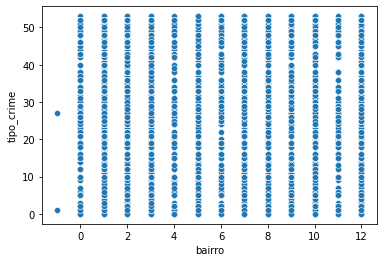

In [7]:
import seaborn as sns
sns.scatterplot(  df.bairro, df.tipo_crime)

/home/valencar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='localizacao', ylabel='tipo_crime'>

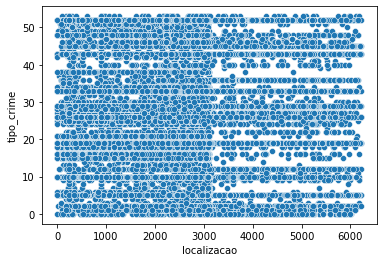

In [8]:
import seaborn as sns
sns.scatterplot( df.localizacao,  df.tipo_crime)

In [9]:
df.head()

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location,bairro,tipo_crime,localizacao
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA",2,43,2903
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA",7,43,2538
2,2009-00004,01/01/2009 01:43:00 AM,01/01/2009 02:20 - 02:35,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...",10,2,4212
3,2009-00005,01/01/2009 02:27:00 AM,01/01/2009 02:20 - 02:45,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA",3,43,2213
4,2009-00006,01/01/2009 02:34:00 AM,01/01/2009 02:15 - 02:35,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA",10,9,2368


In [10]:
df['Reporting Area'].unique()

array([ 504.,  610.,  708.,  105.,  507., 1108.,  411., 1201.,  510.,
        501.,  102.,  604.,  804.,  408.,  705., 1002., 1203.,  602.,
        402.,  505.,  301.,  304.,  910., 1109.,  305.,  607.,  902.,
        904.,  911.,  905.,  701.,  409.,  201., 1101., 1005., 1012.,
        605.,  205., 1004.,  302.,  508.,  403., 1106.,  502.,  106.,
       1010.,  405.,  406., 1105.,  903.,  613.,  803., 1110.,  702.,
        103.,  707.,  801.,  609.,  909., 1107., 1104.,  509.,  606.,
        703.,  603., 1011.,  202.,  107., 1017., 1007., 1001.,  108.,
       1204.,  104., 1301.,  204., 1103.,  601.,  704., 1302.,  503.,
        506.,  805.,  401.,  901., 1111., 1102., 1303.,  101., 1202.,
       1008.,  203.,  706.,  912.,  303.,  908.,  404., 1113.,  611.,
       1006., 1014.,  906.,  612., 1112.,  802.,  407.,  608., 1003.,
       1013., 1009.,  907., 1015.,  410., 1016.,  913., 1304.,   nan,
        109.])

In [11]:
df.Location.value_counts()

100 CAMBRIDGESIDE PLACE, Cambridge, MA                 1352
100 CAMBRIDGESIDE PL, Cambridge, MA                     735
200 Alewife Brook Pky, Cambridge, MA                    542
600 MASSACHUSETTS Avenue, Cambridge, MA                 427
600 Massachusetts Avenue, Cambridge, MA                 396
                                                       ... 
0 BIRCH ST, Cambridge, MA                                 1
Massachusetts Ave & PLEASANT ST, Cambridge, MA            1
MASSACHUSETTS Avenue & Putnam AVENUE, Cambridge, MA       1
Newtowne COURT & Newtowne COURT, Cambridge, MA            1
MAIN STREET & KENDALL SQUARE, Cambridge, MA               1
Name: Location, Length: 6226, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56014 entries, 0 to 56013
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   File Number      56014 non-null  object 
 1   Date of Report   56014 non-null  object 
 2   Crime Date Time  56014 non-null  object 
 3   Crime            56014 non-null  object 
 4   Reporting Area   56012 non-null  float64
 5   Neighborhood     56012 non-null  object 
 6   Location         55931 non-null  object 
 7   bairro           56014 non-null  int8   
 8   tipo_crime       56014 non-null  int8   
 9   localizacao      56014 non-null  int16  
dtypes: float64(1), int16(1), int8(2), object(6)
memory usage: 3.2+ MB


In [13]:
len(df)

56014

In [14]:
df.Crime.value_counts()[:20].sum()

48553

In [15]:
df.Crime.value_counts()[:15].sum()

43987

In [16]:
df.Crime.value_counts()[:15]

Larceny from MV           4837
Hit and Run               4662
Domestic Dispute          3909
Mal. Dest. Property       3671
Simple Assault            3295
Larceny from Building     2857
Shoplifting               2789
Larceny of Bicycle        2750
Housebreak                2676
Forgery                   2584
Warrant Arrest            2575
Larceny from Person       2276
Larceny from Residence    1743
Aggravated Assault        1726
Threats                   1637
Name: Crime, dtype: int64

In [17]:
crimes = list(df.Crime.value_counts()[:15].index)
crimes

['Larceny from MV',
 'Hit and Run',
 'Domestic Dispute',
 'Mal. Dest. Property',
 'Simple Assault',
 'Larceny from Building',
 'Shoplifting',
 'Larceny of Bicycle',
 'Housebreak',
 'Forgery',
 'Warrant Arrest',
 'Larceny from Person',
 'Larceny from Residence',
 'Aggravated Assault',
 'Threats']

In [18]:
df2 = df[df.Crime.str.contains('|'.join(crimes))]
len(df2)

43987

In [19]:
df2.head()

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location,bairro,tipo_crime,localizacao
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA",2,43,2903
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA",7,43,2538
2,2009-00004,01/01/2009 01:43:00 AM,01/01/2009 02:20 - 02:35,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...",10,2,4212
3,2009-00005,01/01/2009 02:27:00 AM,01/01/2009 02:20 - 02:45,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA",3,43,2213
6,2009-00008,01/01/2009 02:37:00 AM,1/1/09 2:37,Mal. Dest. Property,1108.0,North Cambridge,"100 MONTGOMERY STREET, Cambridge, MA",8,33,2080


/home/valencar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tipo_crime', ylabel='localizacao'>

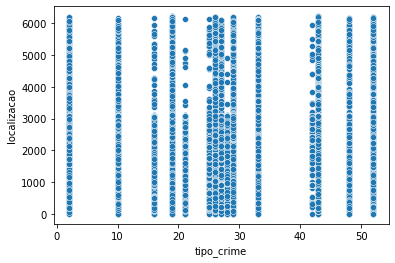

In [20]:
import seaborn as sns
sns.scatterplot(  df2.tipo_crime, df2.localizacao)

In [21]:
df2['Reporting Area'].unique()

array([ 504.,  610.,  708.,  105., 1108.,  411., 1201.,  510.,  102.,
        604.,  804.,  408.,  705., 1002.,  602.,  402.,  505.,  301.,
        304.,  910., 1109.,  305.,  607.,  902.,  904.,  911.,  905.,
        701.,  501.,  409.,  201., 1101., 1012.,  605.,  205., 1004.,
        302.,  508.,  403., 1106.,  502.,  106., 1010.,  405.,  507.,
        903.,  613.,  803., 1110.,  702.,  103., 1105.,  707.,  801.,
        609.,  909., 1107., 1104.,  509.,  606.,  703.,  603., 1011.,
        202.,  107., 1017., 1007., 1001.,  108., 1204.,  104., 1301.,
        204., 1103.,  601.,  704., 1302.,  503.,  805.,  506.,  401.,
       1111., 1102., 1303.,  101., 1202., 1005.,  406.,  203.,  706.,
        912.,  303.,  908.,  404., 1113.,  611., 1006., 1014.,  906.,
        612., 1112.,  802.,  901.,  407., 1008.,  608., 1003., 1013.,
       1009.,  907., 1015.,  410., 1203., 1016., 1304.,  913.,   nan,
        109.])

In [22]:
s = df2['Reporting Area'].unique()
s2 = s.astype(int)
s2

array([                 504,                  610,                  708,
                        105,                 1108,                  411,
                       1201,                  510,                  102,
                        604,                  804,                  408,
                        705,                 1002,                  602,
                        402,                  505,                  301,
                        304,                  910,                 1109,
                        305,                  607,                  902,
                        904,                  911,                  905,
                        701,                  501,                  409,
                        201,                 1101,                 1012,
                        605,                  205,                 1004,
                        302,                  508,                  403,
                       1106,                  502, 

In [23]:
len(s2)

118

In [24]:
df2 = df.fillna(0)
df2['area'] = df2['Reporting Area'].astype(int)
df2.head()

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location,bairro,tipo_crime,localizacao,area
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA",2,43,2903,504
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA",7,43,2538,610
2,2009-00004,01/01/2009 01:43:00 AM,01/01/2009 02:20 - 02:35,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...",10,2,4212,708
3,2009-00005,01/01/2009 02:27:00 AM,01/01/2009 02:20 - 02:45,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA",3,43,2213,105
4,2009-00006,01/01/2009 02:34:00 AM,01/01/2009 02:15 - 02:35,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA",10,9,2368,708


In [25]:
df2.area.value_counts()[:10]

1002    2712
102     2555
501     2168
105     1614
411     1489
708     1443
305     1395
304     1203
107     1073
1101    1051
Name: area, dtype: int64

/home/valencar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area', ylabel='tipo_crime'>

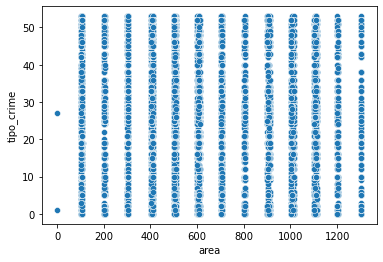

In [26]:
sns.scatterplot(  df2.area,  df2.tipo_crime)

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56014 entries, 0 to 56013
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   File Number      56014 non-null  object 
 1   Date of Report   56014 non-null  object 
 2   Crime Date Time  56014 non-null  object 
 3   Crime            56014 non-null  object 
 4   Reporting Area   56014 non-null  float64
 5   Neighborhood     56014 non-null  object 
 6   Location         56014 non-null  object 
 7   bairro           56014 non-null  int8   
 8   tipo_crime       56014 non-null  int8   
 9   localizacao      56014 non-null  int16  
 10  area             56014 non-null  int64  
dtypes: float64(1), int16(1), int64(1), int8(2), object(6)
memory usage: 3.6+ MB


In [28]:
df2.head()

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location,bairro,tipo_crime,localizacao,area
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA",2,43,2903,504
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA",7,43,2538,610
2,2009-00004,01/01/2009 01:43:00 AM,01/01/2009 02:20 - 02:35,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...",10,2,4212,708
3,2009-00005,01/01/2009 02:27:00 AM,01/01/2009 02:20 - 02:45,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA",3,43,2213,105
4,2009-00006,01/01/2009 02:34:00 AM,01/01/2009 02:15 - 02:35,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA",10,9,2368,708


In [29]:
df2['data_crime'] = pd.to_datetime(df2['Crime Date Time'], infer_datetime_format=True, errors='coerce')
#  format='%d/%m/%Y H:M') #, errors='coerce')
#del df2['datad']
df2.head()

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location,bairro,tipo_crime,localizacao,area,data_crime
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA",2,43,2903,504,2009-01-01 00:39:00
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA",7,43,2538,610,2009-01-01 01:34:00
2,2009-00004,01/01/2009 01:43:00 AM,01/01/2009 02:20 - 02:35,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...",10,2,4212,708,NaT
3,2009-00005,01/01/2009 02:27:00 AM,01/01/2009 02:20 - 02:45,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA",3,43,2213,105,NaT
4,2009-00006,01/01/2009 02:34:00 AM,01/01/2009 02:15 - 02:35,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA",10,9,2368,708,NaT


In [30]:
#del df2['datad']
df2.head()

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location,bairro,tipo_crime,localizacao,area,data_crime
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA",2,43,2903,504,2009-01-01 00:39:00
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA",7,43,2538,610,2009-01-01 01:34:00
2,2009-00004,01/01/2009 01:43:00 AM,01/01/2009 02:20 - 02:35,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...",10,2,4212,708,NaT
3,2009-00005,01/01/2009 02:27:00 AM,01/01/2009 02:20 - 02:45,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA",3,43,2213,105,NaT
4,2009-00006,01/01/2009 02:34:00 AM,01/01/2009 02:15 - 02:35,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA",10,9,2368,708,NaT


In [31]:
from datetime import datetime
import re

def extrair_data(row):
    
    x = row['Crime Date Time']
    
    data = re.search("([0-9]{2}\/[0-9]{2}\/[0-9]{4})", x) #.group(0)
    hora = re.search("([0-9]{2}\:[0-9]{2})", x) #.group(0)
    
    data_crime = data
    
    if data is not None:
        data = data.group(0)
        data_crime = data
        if hora is not None:
            hora = hora.group(0)
        else:
            hora = '00:00'
        data_crime = data + ' ' + hora
        data_crime = datetime.strptime(data_crime, '%m/%d/%Y %H:%M')
    return data_crime
    
df2['data_crime'] = df2.apply( extrair_data, axis=1 )  
df2.head()                                                                        

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location,bairro,tipo_crime,localizacao,area,data_crime
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA",2,43,2903,504,NaT
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA",7,43,2538,610,NaT
2,2009-00004,01/01/2009 01:43:00 AM,01/01/2009 02:20 - 02:35,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...",10,2,4212,708,2009-01-01 02:20:00
3,2009-00005,01/01/2009 02:27:00 AM,01/01/2009 02:20 - 02:45,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA",3,43,2213,105,2009-01-01 02:20:00
4,2009-00006,01/01/2009 02:34:00 AM,01/01/2009 02:15 - 02:35,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA",10,9,2368,708,2009-01-01 02:15:00


In [32]:
df2.data_crime.isna().sum(), len(df2)

(13462, 56014)

In [33]:
df3 = df2[ ~ df2.data_crime.isna()  ]

print(len(df3))
df3.head()

42552


,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location,bairro,tipo_crime,localizacao,area,data_crime
2,2009-00004,01/01/2009 01:43:00 AM,01/01/2009 02:20 - 02:35,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...",10,2,4212,708,2009-01-01 02:20:00
3,2009-00005,01/01/2009 02:27:00 AM,01/01/2009 02:20 - 02:45,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA",3,43,2213,105,2009-01-01 02:20:00
4,2009-00006,01/01/2009 02:34:00 AM,01/01/2009 02:15 - 02:35,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA",10,9,2368,708,2009-01-01 02:15:00
7,2009-00009,01/01/2009 10:42:00 AM,01/01/2009 10:30 - 10:42,Simple Assault,411.0,Area 4,"600 Massachusetts Avenue, Cambridge, MA",1,43,3012,411,2009-01-01 10:30:00
8,2009-00010,01/01/2009 10:47:00 AM,01/01/2009 10:35 - 10:47,Shoplifting,1201.0,Highlands,"200 ALEWIFE BROOK PKY, Cambridge, MA",4,42,2425,1201,2009-01-01 10:35:00


In [34]:
df3.data_crime.isna().sum()

0

In [35]:
len(df3)

42552

CPU times: user 1min 42s, sys: 610 ms, total: 1min 43s
Wall time: 1min 45s


<AxesSubplot:xlabel='data_crime', ylabel='tipo_crime'>

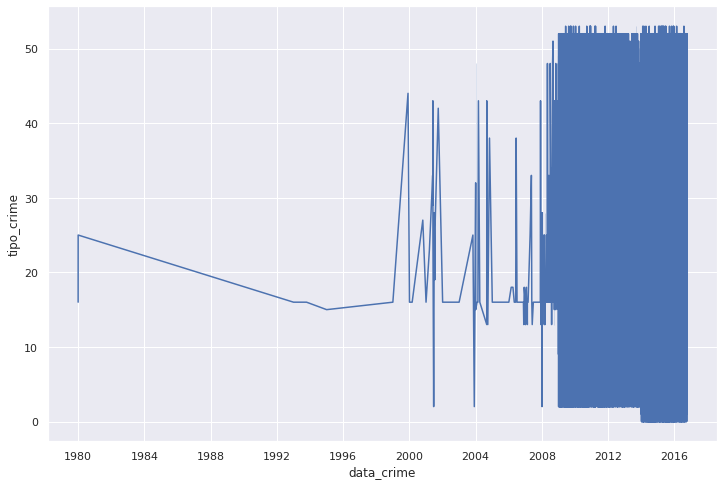

In [36]:
%%time
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x = 'data_crime', y = 'tipo_crime', data = df3)

In [37]:
df3.data_crime.describe()

<ipython-input-37-fcea96f9a202>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df3.data_crime.describe()


count                   42552
unique                  39191
top       2014-10-30 03:06:00
freq                       16
first     1980-01-01 00:00:00
last      2016-09-30 21:43:00
Name: data_crime, dtype: object

In [38]:
len(df3.tipo_crime.unique())

54

In [39]:
df3.Crime.value_counts()

Larceny from MV           4603
Hit and Run               3748
Mal. Dest. Property       3131
Larceny of Bicycle        2590
Larceny from Building     2538
Housebreak                2404
Domestic Dispute          2091
Forgery                   1999
Simple Assault            1972
Larceny from Person       1853
Shoplifting               1776
Larceny from Residence    1575
Warrant Arrest            1166
Threats                   1070
Aggravated Assault        1032
Auto Theft                1016
Flim Flam                  792
Missing Person             696
Admin Error                660
Harassment                 627
Accident                   577
Commercial Break           493
Street Robbery             444
Suspicious Package         381
Phone Calls                367
Taxi Violation             259
Drugs                      255
Violation of R.O.          237
Larceny (Misc)             228
Larceny of Plate           221
Trespassing                219
OUI                        194
Disorder

In [40]:
dfc = df3[ df3.Crime == 'Hit and Run']
len(dfc)

3748

/home/valencar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='data_crime', ylabel='Density'>

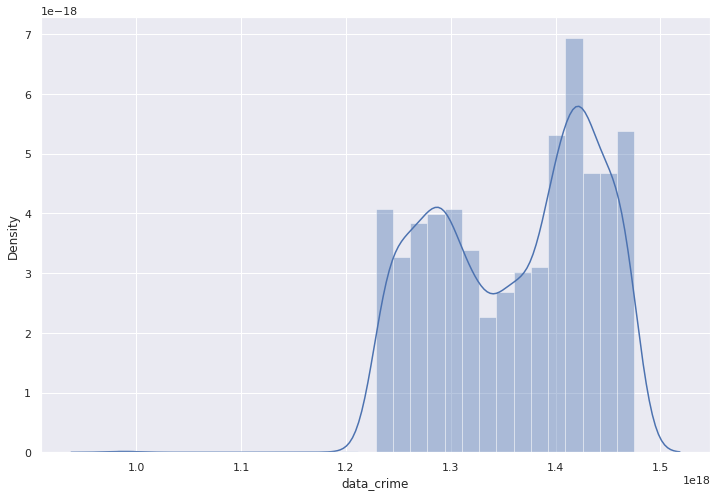

In [41]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(dfc.data_crime)

<AxesSubplot:xlabel='data_crime'>

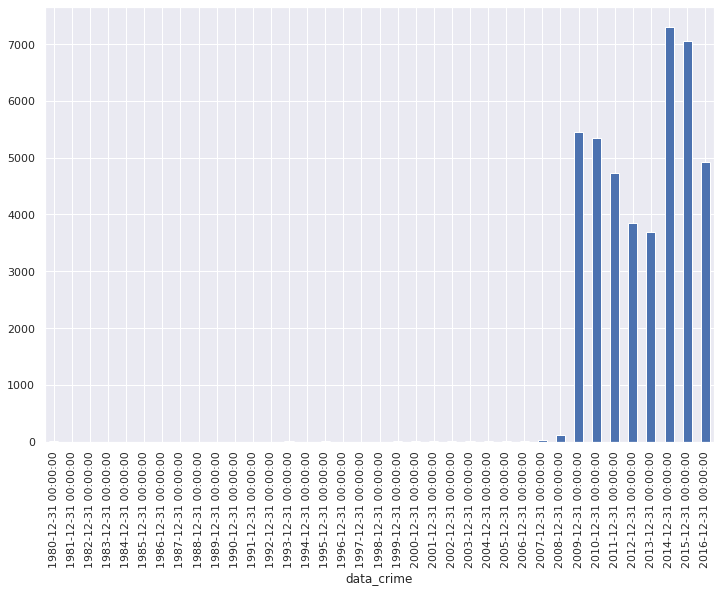

In [42]:
df4 = df3.copy()
df4.set_index('data_crime', inplace=True)
df4.resample('Y').size().plot.bar()

In [43]:
# Janela de 2010 para 2016
data_atual = '2010-01-01'
data_crime_atual = datetime.strptime(data_atual, '%Y-%m-%d')

df5 =  df3.copy()
df6 = df5[ df5.data_crime >= data_crime_atual ]
len(df4), len(df5), len(df6)

(42552, 42552, 36876)

<AxesSubplot:xlabel='data_crime'>

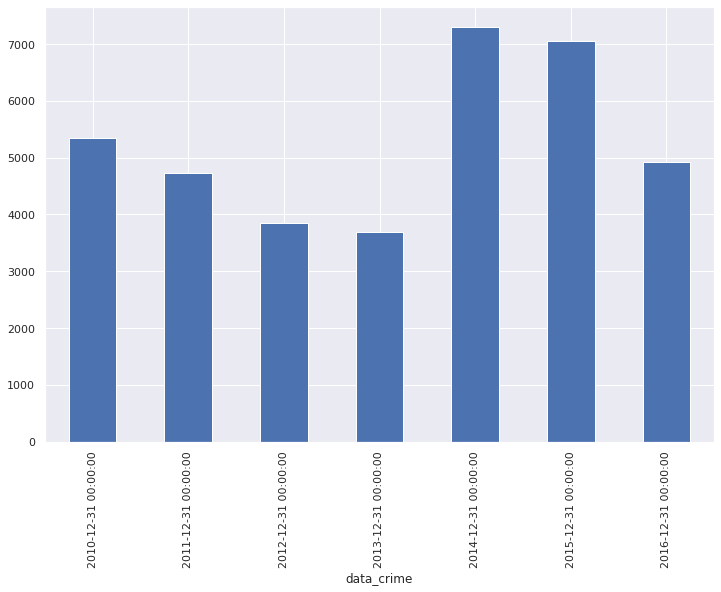

In [44]:
df7 = df6.copy()
df7.set_index('data_crime', inplace=True)
df7.resample('Y').size().plot.bar()

In [45]:
df6.data_crime.describe()

<ipython-input-45-3a87f66ee9f0>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df6.data_crime.describe()


count                   36876
unique                  34098
top       2014-10-30 03:06:00
freq                       16
first     2010-01-01 00:00:00
last      2016-09-30 21:43:00
Name: data_crime, dtype: object

In [46]:
data_atual = '2015-09-30'
data_crime_atual = datetime.strptime(data_atual, '%Y-%m-%d')

df8 =  df6.copy()
df8 = df8[ df8.data_crime >= data_crime_atual ]
len(df8)

6647

<AxesSubplot:xlabel='data_crime'>

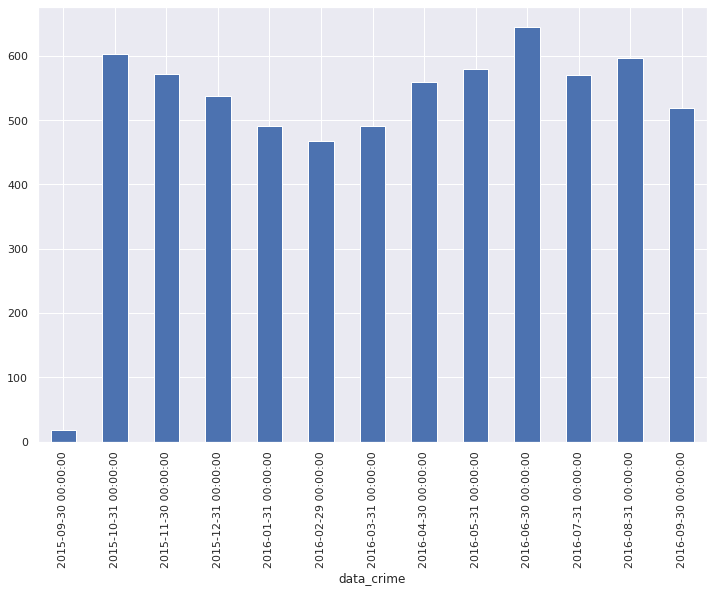

In [47]:
df9 = df8.copy()
df9.set_index('data_crime', inplace=True)
df9.resample('M').size().plot.bar()

In [48]:
#df9 = df8.copy()
#df9.set_index('data_crime', inplace=True)
#df9.resample('D').size().plot.bar()

In [49]:
#df9 = df8.copy()
#df9.set_index('data_crime', inplace=True)
#df9.resample('H').size().plot.bar()

In [50]:
# Comportamento do roubo por hora 

dfc = df3[ df3.Crime == 'Hit and Run']
len(dfc)

3748

In [51]:
df = dfc.copy()
df['hora'] = dfc.data_crime.apply(lambda x : x.hour)
df.head()

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location,bairro,tipo_crime,localizacao,area,data_crime,hora
9,2009-00011,01/01/2009 12:37:00 PM,12/31/2008 10:00 - 01/01/2009 10:00,Hit and Run,510.0,Cambridgeport,"FAIRMONT Avenue & Fairmont STREET, Cambridge, MA",2,19,4339,510,2008-12-31 10:00:00,10
12,2009-00014,01/01/2009 02:35:00 PM,12/31/2008 22:00 - 01/01/2009 02:00,Hit and Run,604.0,Mid-Cambridge,"400 BROADWAY, Cambridge, MA",7,19,2859,604,2008-12-31 22:00:00,22
17,2009-00021,01/02/2009 05:33:00 AM,01/02/2009 05:30 - 05:32,Hit and Run,705.0,Riverside,"Green STREET & Pleasant STREET, Cambridge, MA",10,19,4652,705,2009-01-02 05:30:00,5
18,2009-00022,01/02/2009 08:03:00 AM,12/27/2008 00:01 - 12/28/2008 13:46,Hit and Run,1002.0,West Cambridge,"100 MOUNT AUBURN STREET, Cambridge, MA",12,19,2087,1002,2008-12-27 00:01:00,0
21,2009-00027,01/02/2009 12:44:00 PM,12/30/2008 12:00 - 01/02/2009 12:30,Hit and Run,402.0,Area 4,"Bristol STREET & MARKET STREET, Cambridge, MA",1,19,3697,402,2008-12-30 12:00:00,12


In [52]:
hora_roubo = df.hora.value_counts().to_frame().reset_index()
#hora_roubo.index = 'horario'

hora_roubo.columns = [ 'hora', 'Hit and Run']
hora_roubo.head()

,hora,Hit and Run
0,12,254
1,18,243
2,8,241
3,19,229
4,16,222


In [53]:
df_roubo = hora_roubo.sort_values(by='hora', ascending=False).reset_index(drop=True)
df_roubo

,hora,Hit and Run
0,23,125
1,22,128
2,21,162
3,20,209
4,19,229
5,18,243
6,17,209
7,16,222
8,15,218
9,14,204


<AxesSubplot:xlabel='Hit and Run', ylabel='hora'>

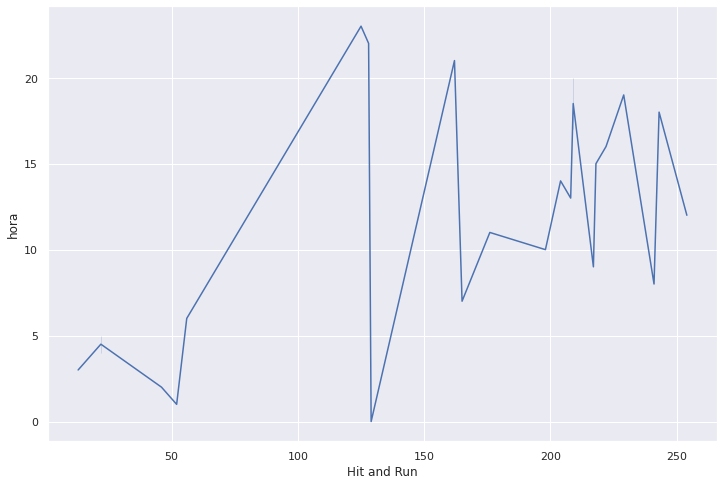

In [54]:
sns.lineplot(x = 'Hit and Run', y='hora', data=df_roubo)

<AxesSubplot:xlabel='hora', ylabel='Hit and Run'>

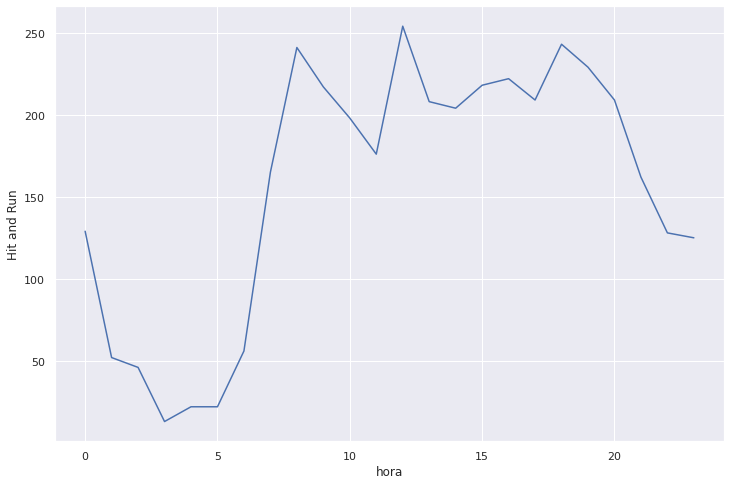

In [55]:
sns.lineplot(y = 'Hit and Run', x='hora', data=df_roubo)

<AxesSubplot:>

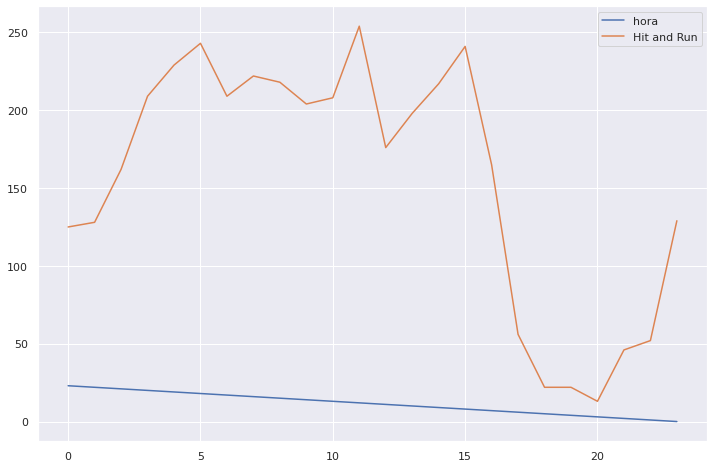

In [56]:
df_roubo.plot() #kind = 'barh')